In [1]:
from math import e
from optimisation_ntn.simulation import Simulation, SimulationConfig
from optimisation_ntn.algorithms.assignment.qlearning_trainer import QLearningTrainer
import numpy as np
from optimisation_ntn.algorithms.assignment.strategy_factory import QLearningAssignment

np.random.seed(1)

# Create simulation
sim = Simulation(
    config=SimulationConfig(
        seed=None,
        debug=False,
        user_count=20,
        power_strategy="OnDemand",
        save_results=False,
    )
)

# Create trainer
trainer = QLearningTrainer(
    simulation=sim,
    episodes=10,
    save_path="qtable.pkl",
)

# Train the agent
trainer.train()

# Test the trained agent
print("\nTesting trained agent...")
sim = Simulation(
    config=SimulationConfig(
        seed=3,
        debug=False,
        user_count=20,
        power_strategy="OnDemand",
        save_results=False,
    )
)
sim.reset()
strategy = QLearningAssignment(sim.network, epsilon=0.0, qtable_path="qtable.pkl")
sim.assignment_strategy = strategy
sim.run()

print(f"Trained agent Final energy consumed: {sim.system_energy_consumed:.2f}")
print(
    f"Trained agent Final QoS satisfaction: {sim.evaluate_qos_satisfaction()/100:.2%}"
)

sim.reset()
strategy = QLearningAssignment(sim.network, epsilon=0.0)
sim.assignment_strategy = strategy
sim.run()

print(f"Random agent Final energy consumed: {sim.system_energy_consumed:.2f}")
print(f"Random agent Final QoS satisfaction: {sim.evaluate_qos_satisfaction()/100:.2%}")

Max energy: 4181.80, Min energy: 2103.99
Starting training...
Episode 10/10
Best Reward: 609.73
Best QoS: 1000.00
Best Energy Score: -390.27
Total Energy: 3856.99J
Episode Reward: 466.32
Epsilon: 0.951
---
Training completed!
Best reward: 609.73
Best QoS: 1000.00
Best Energy Score: -390.27

Testing trained agent...
Trained agent Final energy consumed: 3547.69
Trained agent Final QoS satisfaction: 90.00%
Random agent Final energy consumed: 3825.09
Random agent Final QoS satisfaction: 90.00%


In [18]:
from math import e
from optimisation_ntn.simulation import Simulation, SimulationConfig
from optimisation_ntn.algorithms.assignment.qlearning_trainer import QLearningTrainer
import numpy as np
from optimisation_ntn.algorithms.assignment.strategy_factory import QLearningAssignment

np.random.seed(1)

energy_consumed = []
qos_satisfaction = []

for i in range(10, 20, 1):
    # Create simulation
    sim = Simulation(
        config=SimulationConfig(
            seed=None,
            debug=False,
            user_count=20,
            power_strategy="OnDemand",
            save_results=False,
        )
    )

    # Create trainer
    trainer = QLearningTrainer(
        simulation=sim,
        episodes=i,
        save_path="qtable.pkl",
    )

    # Train the agent
    trainer.train()

    # Test the trained agent
    print("\nTesting trained agent...")
    sim = Simulation(
        config=SimulationConfig(
            seed=20,
            debug=False,
            user_count=20,
            power_strategy="OnDemand",
            save_results=False,
        )
    )
    sim.reset()
    strategy = QLearningAssignment(sim.network, epsilon=0.0, qtable_path="qtable.pkl")
    sim.assignment_strategy = strategy
    sim.run()

    print(f"Trained agent Final energy consumed: {sim.system_energy_consumed:.2f}")
    print(
        f"Trained agent Final QoS satisfaction: {sim.evaluate_qos_satisfaction()/100:.2%}"
    )

    qos_satisfaction.append(sim.evaluate_qos_satisfaction() / 100)
    energy_consumed.append(sim.system_energy_consumed)

print(energy_consumed)
print(qos_satisfaction)

Max energy: 4426.80, Min energy: 2103.99
Starting training...
Episode 10/10
Best Reward: 765.11
Best QoS: 1000.00
Best Energy Score: -234.89
Total Energy: 3951.79J
Episode Reward: 607.00
Epsilon: 0.951
---
Training completed!
Best reward: 765.11
Best QoS: 1000.00
Best Energy Score: -234.89

Testing trained agent...
Trained agent Final energy consumed: 3594.89
Trained agent Final QoS satisfaction: 90.00%
Max energy: 4426.80, Min energy: 2103.99
Starting training...
Episode 10/11
Best Reward: 765.11
Best QoS: 1000.00
Best Energy Score: -234.89
Total Energy: 3951.79J
Episode Reward: 607.00
Epsilon: 0.951
---
Training completed!
Best reward: 765.11
Best QoS: 1000.00
Best Energy Score: -234.89

Testing trained agent...
Trained agent Final energy consumed: 3692.00
Trained agent Final QoS satisfaction: 95.00%
Max energy: 4426.80, Min energy: 2103.99
Starting training...
Episode 10/12
Best Reward: 765.11
Best QoS: 1000.00
Best Energy Score: -234.89
Total Energy: 3951.79J
Episode Reward: 607.00

In [19]:
energy_consumed_bck = [bck for bck in energy_consumed]
qos_satisfaction_bck = [bck for bck in qos_satisfaction]

In [20]:
energy_times_qos = [
    energy_consumed_bck[i] / qos_satisfaction_bck[i]
    for i in range(len(energy_consumed_bck))
]

In [21]:
energy_times_qos

[3994.324384372721,
 3886.3113011404976,
 3886.311301140498,
 4228.81516879112,
 4058.327542829408,
 4058.7709344549567,
 3886.3113011404985,
 3886.101273528396,
 3885.891245916295,
 3886.1012735283957]

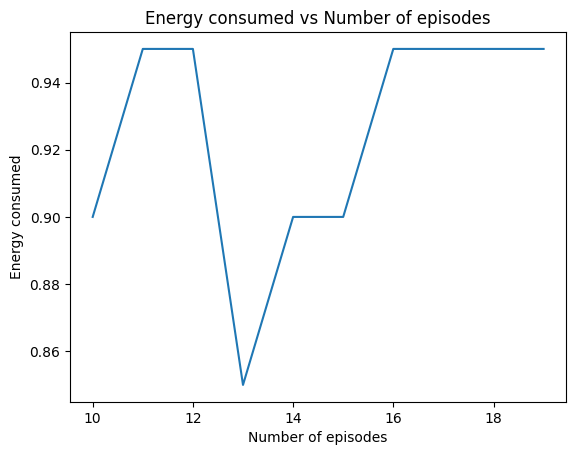

In [25]:
import matplotlib.pyplot as plt


plt.plot(range(10, 20, 1), qos_satisfaction)
plt.xlabel("Number of episodes")
plt.ylabel("Energy consumed")
plt.title("Energy consumed vs Number of episodes")
plt.show()

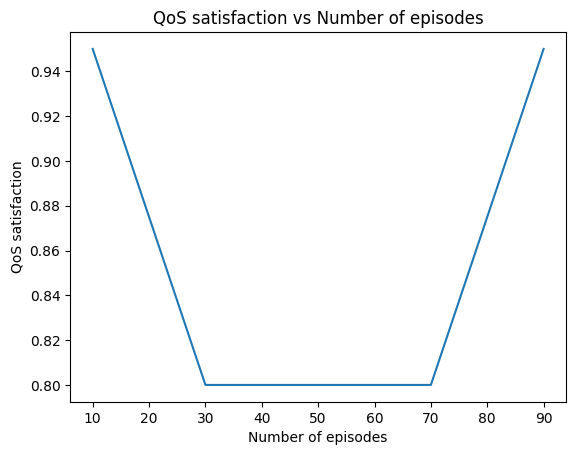

In [17]:
plt.plot(range(10, 100, 20), qos_satisfaction)
plt.xlabel("Number of episodes")
plt.ylabel("QoS satisfaction")
plt.title("QoS satisfaction vs Number of episodes")
plt.show()

In [5]:
from optimisation_ntn.simulation import Simulation, SimulationConfig
from optimisation_ntn.algorithms.assignment.matrix_based import MatrixBasedAssignment
import numpy as np

from optimisation_ntn.algorithms.assignment.strategy_factory import (
    QLearningAssignment,
    RandomAssignment,
    TimeGreedyAssignment,
    ClosestNodeAssignment,
    HAPSOnlyAssignment,
)

sim = Simulation(
    config=SimulationConfig(
        seed=10,
        user_count=10,
        power_strategy="OnDemand",
        save_results=False,
    )
)

assignment_vector = np.array([0, 0, 3, 0, 4, 4, 4, 4, 4, 3])
assignment_vector = np.array([4, 0, 2, 1])
matrix_strategy = MatrixBasedAssignment(sim.network)
matrix_strategy.set_assignment_matrix(assignment_vector)
sim.assignment_strategy = matrix_strategy

while sim.current_time < sim.max_time:
    sim.step()

energy_consumed = sim.system_energy_consumed
print(energy_consumed)
print(sim.evaluate_qos_satisfaction())

793.5990524629937
40.0


In [6]:
sim.reset()
assignment_vector = np.array([0, 0, 3, 0, 4, 4, 4, 4, 4, 3])
assignment_vector = np.array([0, 3, 3, 0, 0, 1, 2, 0, 4, 2])
matrix_strategy = MatrixBasedAssignment(sim.network)
matrix_strategy.set_assignment_matrix(assignment_vector)
sim.assignment_strategy = matrix_strategy

while sim.current_time < sim.max_time:
    sim.step()

energy_consumed = sim.system_energy_consumed
print(energy_consumed)
print(sim.evaluate_qos_satisfaction())

1764.498104925987
90.0


In [7]:
sim.reset()
strategy_instance = QLearningAssignment(sim.network)
strategy_instance.epsilon = 0
sim.assignment_strategy = strategy_instance
sim.assignment_strategy.load_q_table("../qtable.npy")
sim.run()

AttributeError: 'QLearningAssignment' object has no attribute 'load_q_table'

In [ ]:
sim.reset()
sim.run_with_assignment(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [ ]:
sim.reset()
sim.assignment_strategy = QLearningAssignment(sim.network)
sim.run()

energy_consumed = sim.system_energy_consumed
qos_score = sim.evaluate_qos_satisfaction()
print(energy_consumed)
print(qos_score)

# Load and analyze Q-table
q_learning = QLearningAssignment(sim.network)
q_learning.load_q_table("../qtable.npy")

# Print summary
q_learning.print_q_table_summary()

# Interpret specific state
state = list(q_learning.q_table.keys())[0]  # Get first state
print("\nAnalyzing first state:")
print(q_learning.interpret_state(state))

In [ ]:
strategies = [
    QLearningAssignment,
    RandomAssignment,
    TimeGreedyAssignment,
    ClosestNodeAssignment,
    HAPSOnlyAssignment,
]

sim = Simulation(
    config=SimulationConfig(
        seed=1,
        user_count=10,
        power_strategy="OnDemand",
        save_results=False,
    )
)

strategy_instance = RandomAssignment(sim.network)
sim.assignment_strategy = strategy_instance
sim.run()
energy_consumed = sim.system_energy_consumed
qos_score = sim.evaluate_qos_satisfaction()

for strategy in strategies:
    sim.reset()
    strategy_instance = strategy(sim.network)
    sim.assignment_strategy = strategy_instance
    sim.run()
    energy_consumed = sim.system_energy_consumed
    qos_score = sim.evaluate_qos_satisfaction()
    print("-" * 10)
    print(strategy.__name__)
    print(energy_consumed)
    print(qos_score)

In [ ]:
# do a brute force search for the best assignment matrix

import itertools
from optimisation_ntn.algorithms.assignment.strategy_factory import (
    AssignmentStrategyFactory,
)
from optimisation_ntn.simulation import Simulation, SimulationConfig
import numpy as np

sim = Simulation(
    config=SimulationConfig(
        seed=1,
        user_count=2,
        power_strategy="OnDemand",
        save_results=False,
    )
)


n_nodes = len(sim.network.compute_nodes)
n_users = len(sim.network.user_nodes)

all_matrices = list(itertools.product(range(n_nodes), repeat=n_users))
print(len(all_matrices))

min_energy = float("inf")
best_matrix = None
# run all the combinations of assignment matrices (n_nodes^n_users)
for i in range(len(all_matrices)):
    assignment_matrix = all_matrices[i]
    sim.reset()
    sim.run_with_assignment(assignment_matrix)
    energy_consumed = sim.system_energy_consumed
    qos_score = sim.evaluate_qos_satisfaction()
    # print(energy_consumed)
    # print(qos_score)
    if qos_score == 100:
        if energy_consumed < min_energy:
            print(f"New best matrix found! Energy: {energy_consumed}, QoS: {qos_score}")
            min_energy = energy_consumed
            best_matrix = assignment_matrix

    if i % 100 == 0:
        print(f"Processed {i/len(all_matrices)*100:.2f}%")

print(best_matrix)
print(min_energy)